In [254]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df = pd.read_csv("movies.csv")

In [255]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


Conclusion:
* Gồm 7668 records, 15 cột thuộc tính
* name : tên bộ phim
* rating: biểu thị xếp hạng phân loại độ tuổi, vd: R (Restricted): Phim hạn chế, chỉ dành cho khán giả từ 17 tuổi trở lên. Nếu dưới 17 tuổi, cần có cha mẹ hoặc người giám hộ đi kèm.
* genre: thể loại phim, vd: Action (Hành động), Comedy (Hài)
* year: năm phát hành phim
* released: Ngày phát hành phim và quốc gia phát hành phim, vd: June 13, 1980 (United States)
* score: điểm đánh giá trung bình mà người dùng chấm cho bộ phim
* votes: số lượng người dùng đã tham gia đánh giá cho bộ phim
* director: tên đạo diễn bộ phim
* writer: tên biên kịch của bộ phim
* star: tên của diễn viên chính trong bộ phim
* country: quốc giá phát hành bộ phim
* budget: ngân sách bộ phim
* gross: doanh thu của bộ phim
* company : công ty sản xuất bộ phim
* runtime: thời lượng bộ phim




In [257]:
(df.isnull().mean() * 100).sort_values(ascending=False)

budget      28.312467
gross        2.464789
rating       1.004173
company      0.221701
runtime      0.052165
score        0.039124
votes        0.039124
country      0.039124
writer       0.039124
released     0.026082
star         0.013041
year         0.000000
genre        0.000000
name         0.000000
director     0.000000
dtype: float64

Conclusion:
* Cột 'budget' có 28.3% không có giá trị(NaN)
* Cột 'gross' có 2.4% không có giá trị(NaN)
* Cột 'rating' có 1% không có giá trị(NaN)
...



In [258]:
pattern = r'([A-Za-z]+ \d{1,2}, \d{4}) \((.+?)\)'
df[['released_date', 'released_country']] = df['released'].str.extract(pattern)

In [259]:
df[df['released_country']!=df['country']][['released_country','country']]

released_country         country
0       United States  United Kingdom
11      United States    South Africa
20      United States    West Germany
27      United States  United Kingdom
31      United States          Canada
...               ...             ...
7653           Mexico   United States
7655    United States           China
7657    United States           China
7665         Cameroon   United States
7667    United States    South Africa

[2123 rows x 2 columns]

Conclusion: Có sự sai lệnh thông tin giữa cột released và cột country

In [260]:
df['released_date'] = pd.to_datetime(df['released_date'])

In [261]:
df[df['year']!=df['released_date'].dt.year][['released_date', 'year']]

released_date  year
8       1981-06-19  1980
11      1984-10-26  1980
21      1981-04-24  1980
33      1981-04-24  1980
40      1981-10-09  1980
...            ...   ...
7525    2020-01-17  2019
7580    2020-06-26  2019
7584    2020-02-04  2019
7604    2020-05-19  2019
7641    2020-03-03  2019

[1356 rows x 2 columns]

Conclusion: Có sự sai lệnh thông tin giữa cột released và cột year

<h2>Data Cleaning</h2>

e:\HOCTAP\EDA\venv\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='budget'>

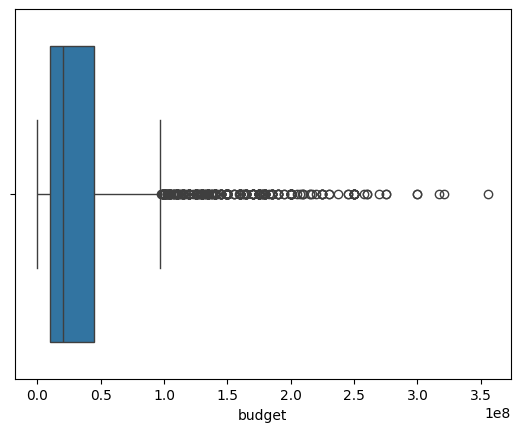

In [262]:
sns.boxplot(data=df, x='budget')

In [263]:
df['budget'] = df['budget'].fillna(value=df['budget'].median())

e:\HOCTAP\EDA\venv\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='gross'>

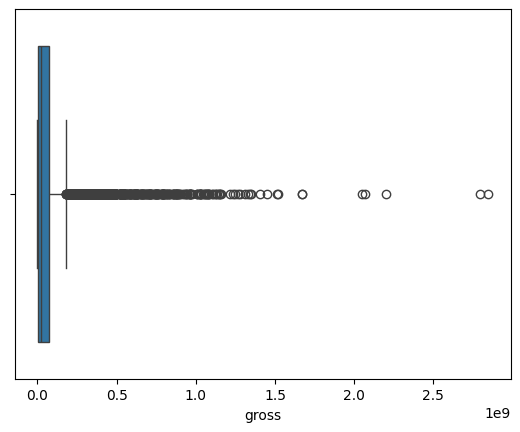

In [264]:
sns.boxplot(data=df, x='gross')

In [265]:
df['gross'] = df['gross'].fillna(value=df['gross'].median())

In [266]:
df['rating'] = df['rating'].fillna(value=df['rating'].mode()[0])
df.dropna(inplace=True)


In [267]:
(df.isnull().mean() * 100).sort_values(ascending=False)

name                0.0
rating              0.0
genre               0.0
year                0.0
released            0.0
score               0.0
votes               0.0
director            0.0
writer              0.0
star                0.0
country             0.0
budget              0.0
gross               0.0
company             0.0
runtime             0.0
released_date       0.0
released_country    0.0
dtype: float64

In [268]:
df.drop_duplicates(inplace=True)

In [269]:
df = df.drop(columns=['released', 'year', 'country'])

In [270]:
df.head()

name rating      genre  score  \
0                                     The Shining      R      Drama    8.4   
1                                 The Blue Lagoon      R  Adventure    5.8   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action    8.7   
3                                       Airplane!     PG     Comedy    7.7   
4                                      Caddyshack      R     Comedy    7.3   

       votes         director                   writer            star  \
0   927000.0  Stanley Kubrick             Stephen King  Jack Nicholson   
1    65000.0   Randal Kleiser  Henry De Vere Stacpoole  Brooke Shields   
2  1200000.0   Irvin Kershner           Leigh Brackett     Mark Hamill   
3   221000.0     Jim Abrahams             Jim Abrahams     Robert Hays   
4   108000.0     Harold Ramis       Brian Doyle-Murray     Chevy Chase   

       budget        gross             company  runtime released_date  \
0  19000000.0   46998772.0        Warner Bros.    146.0    1980-06-13   
1   4500000.0   58853106.0   Columbia Pictures    104.0    1980-07-02   
2  18000000.0  538375067.0           Lucasfilm    124.0    1980-06-20   
3   3500000.0   83453539.0  Paramount Pictures     88.0    1980-07-02   
4   6000000.0   39846344.0      Orion Pictures     98.0    1980-07-25   

  released_country  
0    United States  
1    United States  
2    United States  
3    United States  
4    United States

<h2>Data visualiztion</h2>

In [271]:
df['rating'].value_counts()

rating
R            3725
PG-13        2102
PG           1243
Not Rated     276
G             152
Unrated        49
NC-17          23
TV-MA           9
TV-PG           3
X               3
Approved        1
TV-14           1
Name: count, dtype: int64

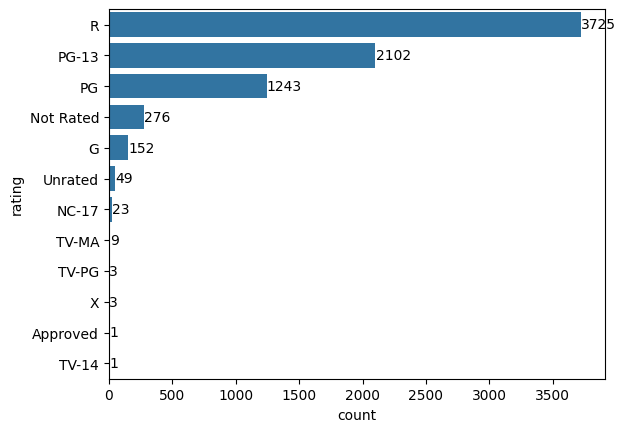

In [272]:
ax = sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
for bar in ax.patches:
    num_per_rating = bar.get_width()
    ax.text(
        bar.get_width() + 0.5,  
        bar.get_y() + bar.get_height() / 2,  
        f'{num_per_rating:.0f}', 
        va='center' 
    )

Conclusion:
* R (Restricted) có số lượng cao nhất (3725 phim), cho thấy các phim dành cho người lớn chiếm ưu thế lớn.
    * Các phim R-rated thường bao gồm nội dung bạo lực, ngôn từ mạnh, hoặc cảnh không phù hợp với trẻ em dưới 17 tuổi.
    * Điều này phản ánh thực tế rằng phần lớn các phim hướng đến đối tượng người lớn.
* PG-13 (Parents Strongly Cautioned) đứng thứ hai (2102 phim), tập trung vào các phim có nội dung nhẹ nhàng hơn nhưng vẫn không phù hợp hoàn toàn với trẻ em dưới 13 tuổi.
    * Đây là nhóm phù hợp với khán giả rộng hơn, bao gồm cả gia đình.
* PG (Parental Guidance) chiếm vị trí thứ ba (1243 phim), với nội dung phù hợp hơn với trẻ em nhưng vẫn cần sự giám sát từ phụ huynh.

In [273]:
df['genre'].value_counts()

genre
Comedy       2225
Action       1697
Drama        1486
Crime         544
Biography     439
Adventure     426
Animation     337
Horror        319
Fantasy        43
Mystery        19
Thriller       14
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
Sport           1
Name: count, dtype: int64

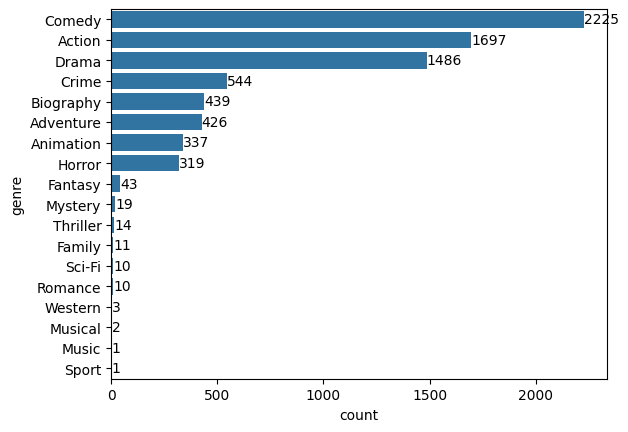

In [274]:
ax = sns.countplot(data=df, y='genre', order=df['genre'].value_counts().index)
for bar in ax.patches:
    num_per_genre = bar.get_width()
    ax.text(
        bar.get_width() + 0.5,  
        bar.get_y() + bar.get_height() / 2,  
        f'{num_per_genre:.0f}', 
        va='center' 
    )

Conclusion:
* Comedy (Hài): 2225 phim
    * Đây là thể loại được ưa chuộng nhất, chiếm phần lớn số lượng phim.
    * Phim hài thường có đối tượng khán giả rộng rãi, dễ tiếp cận và mang tính giải trí cao, giúp thể loại này luôn được yêu thích.
* Action (Hành động): 1697 phim
    * Thể loại hành động đứng thứ hai, phản ánh sự phổ biến của các bộ phim tập trung vào các cảnh quay hồi hộp, hấp dẫn, thường với quy mô lớn.
    * Thể loại này cũng thường kết hợp với các yếu tố khác như phiêu lưu hoặc giả tưởng.
* Drama (Chính kịch): 1486 phim
    * Phim chính kịch đứng thứ ba, cho thấy sự quan tâm lớn của khán giả với các câu chuyện có chiều sâu, tập trung vào cảm xúc và các vấn đề xã hội.

In [275]:
df['released_date'].dt.year.value_counts().head()

released_date
2019    225
2015    213
2007    212
2011    210
2003    207
Name: count, dtype: int64

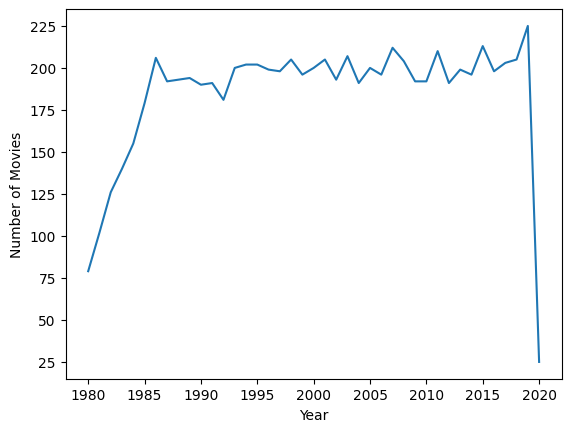

In [276]:
ax = sns.lineplot(data=df['released_date'].dt.year.value_counts())
ax.set_xlabel('Year') 
ax.set_ylabel('Number of Movies')
plt.show()

Conclusion:
* Tăng trưởng ban đầu:
    * Từ năm 1980 đến khoảng 1985, số lượng phim sản xuất mỗi năm tăng lên đáng kể.
    * Đây có thể phản ánh sự phát triển của ngành công nghiệp điện ảnh, cũng như sự cải tiến trong công nghệ sản xuất phim và gia tăng nhu cầu giải trí.
* Giai đoạn ổn định:
    * Từ khoảng năm 1985 đến 2019, số lượng phim sản xuất hàng năm duy trì ở mức cao, dao động nhẹ quanh con số 200 phim/năm.
    * Điều này thể hiện sự ổn định trong sản xuất phim, với nhiều phim được phát hành đều đặn mỗi năm.
* Giảm mạnh năm 2020:
    * Số lượng phim giảm đột ngột trong năm 2020, có thể liên quan đến các yếu tố ngoại cảnh như đại dịch COVID-19, dẫn đến việc đình trệ hoặc hủy bỏ nhiều dự án phim.

In [277]:
df['score'].describe()

count    7587.000000
mean        6.391433
std         0.967857
min         1.900000
25%         5.800000
50%         6.500000
75%         7.100000
max         9.300000
Name: score, dtype: float64

<Axes: xlabel='score', ylabel='Density'>

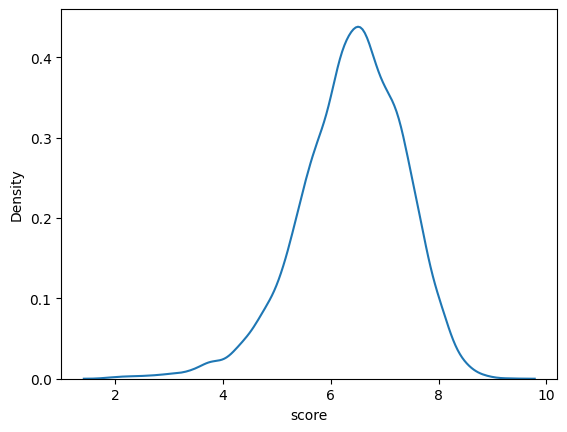

In [278]:
sns.kdeplot(data=df, x='score')

Conclusion:
* Điểm trung bình (mean): 6.39.
    * Điều này cho thấy các phim trên IMDb có xu hướng được đánh giá tương đối tích cực, với điểm số ở mức trên trung bình.
* Độ lệch chuẩn (std): 0.97.
    * Điểm số không quá phân tán; đa số phim có điểm gần với trung bình.
* Phân vị (percentiles):
    * 25% phim có điểm ≤ 5.8: Đây là nhóm phim nhận đánh giá thấp.
    * 50% phim có điểm ≤ 6.5: Trung vị khá sát với điểm trung bình, chứng tỏ phân phối không bị lệch quá nhiều.
    * 75% phim có điểm ≤ 7.1: Nhóm phim tốt nhận được điểm cao hơn 7.

In [279]:
df[df['score'] == df['score'].max()]

name rating  genre  score      votes  \
2443  The Shawshank Redemption      R  Drama    9.3  2400000.0   

            director        writer         star      budget       gross  \
2443  Frank Darabont  Stephen King  Tim Robbins  25000000.0  28817291.0   

                        company  runtime released_date released_country  
2443  Castle Rock Entertainment    142.0    1994-10-14    United States

In [280]:
df[df['score'] == df['score'].min()]

name rating   genre  score    votes  \
4594  Superbabies: Baby Geniuses 2     PG  Comedy    1.9  30000.0   
5306                Disaster Movie  PG-13  Comedy    1.9  88000.0   
5354       The Hottie & the Nottie  PG-13  Comedy    1.9  36000.0   

             director           writer            star      budget  \
4594        Bob Clark  Robert Grasmere      Jon Voight  20000000.0   
5306  Jason Friedberg  Jason Friedberg  Carmen Electra  20000000.0   
5354       Tom Putnam     Heidi Ferrer    Paris Hilton  20500000.0   

           gross                   company  runtime released_date  \
4594   9448644.0  ApolloMedia Distribution     88.0    2004-08-27   
5306  34816824.0                 Lionsgate     87.0    2008-08-29   
5354   1596232.0           Purple Pictures     91.0    2008-02-21   

     released_country  
4594    United States  
5306    United States  
5354           Russia

In [281]:
df['year'] = df['released_date'].dt.year

<Axes: xlabel='year', ylabel='score'>

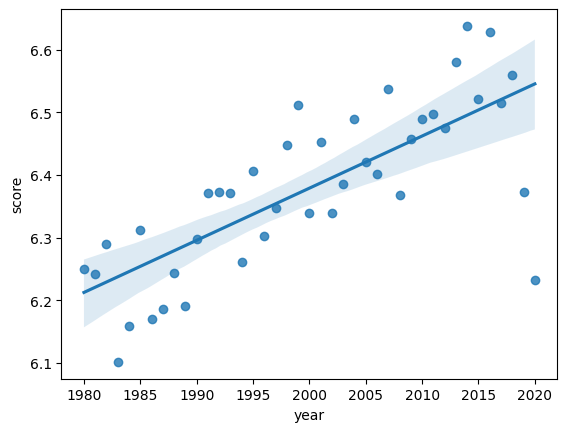

In [282]:
df_grouped = df.groupby('year')['score'].mean().reset_index()
sns.regplot(data=df_grouped, x='year', y='score')

Conclusion: Khi năm (year) tăng lên, giá trị score cũng có xu hướng tăng theo.

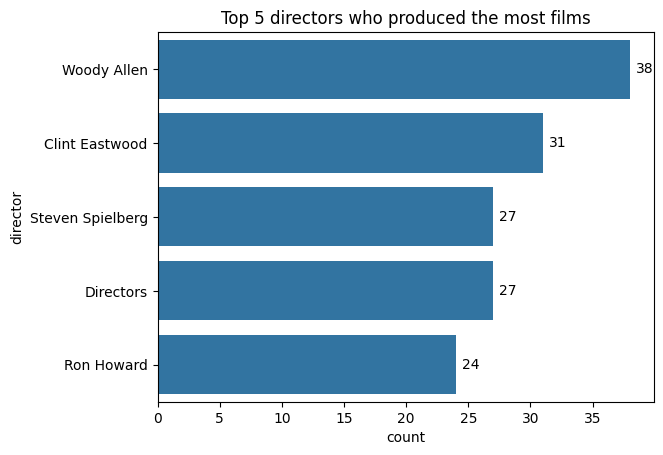

In [283]:
top_5_directors = df['director'].value_counts().head(5).index
filtered_df = df[df['director'].isin(top_5_directors)]

ax = sns.countplot(
    data=filtered_df,
    y='director',
    order=top_5_directors
)

for bar in ax.patches:
    percentage = bar.get_width()
    ax.text(
        bar.get_width() + 0.5,  
        bar.get_y() + bar.get_height() / 2, 
        f'{percentage:.0f}', 
        va='center'  
    )
plt.title("Top 5 directors who produced the most films")
plt.show()

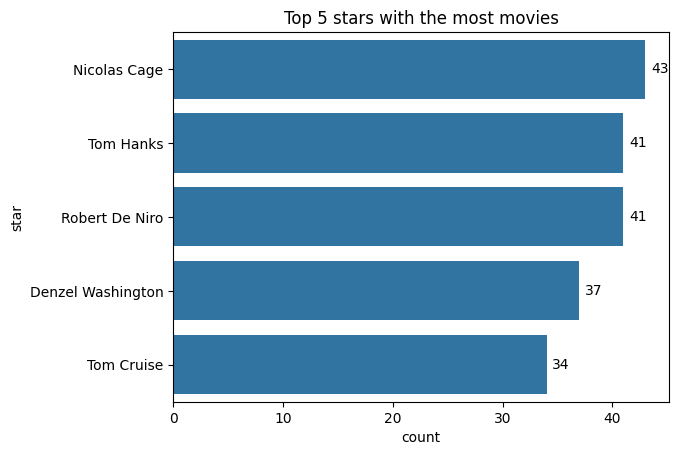

In [284]:
top_5_stars = df['star'].value_counts().head(5).index
filtered_df = df[df['star'].isin(top_5_stars)]

ax = sns.countplot(
    data=filtered_df,
    y='star',
    stat='count',
    order=top_5_stars
)

for bar in ax.patches:
    percentage = bar.get_width()
    ax.text(
        bar.get_width() + 0.5,  
        bar.get_y() + bar.get_height() / 2, 
        f'{percentage:.0f}', 
        va='center'  
    )
plt.title("Top 5 stars with the most movies")
plt.show()

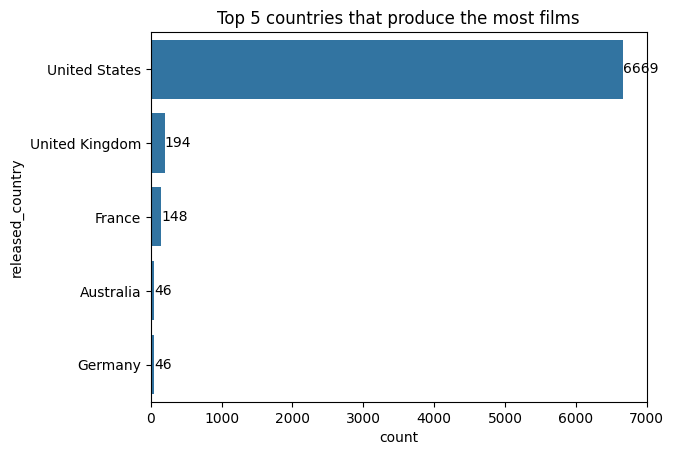

In [285]:
top_5_countrys = df['released_country'].value_counts().head(5).index
filtered_df = df[df['released_country'].isin(top_5_countrys)]

ax = sns.countplot(
    data=filtered_df,
    y='released_country',
    order=top_5_countrys
)

for bar in ax.patches:
    percentage = bar.get_width()
    ax.text(
        bar.get_width() + 0.5,  
        bar.get_y() + bar.get_height() / 2, 
        f'{percentage:.0f}', 
        va='center'  
    )
plt.title("Top 5 countries that produce the most films")
plt.show()

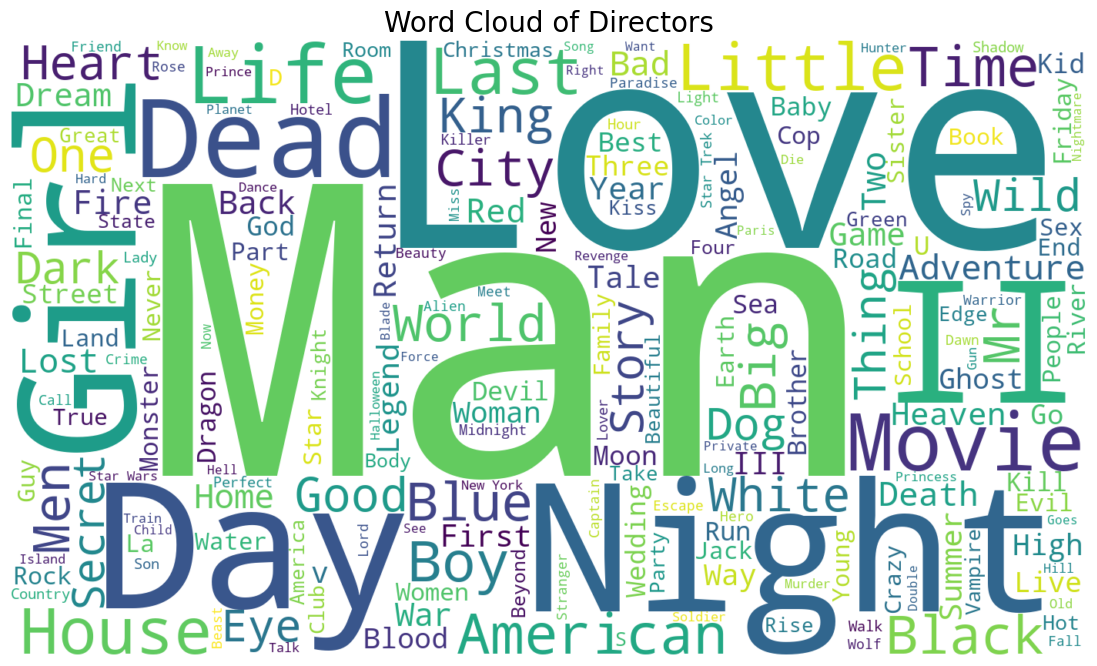

In [286]:
text = " ".join(df["name"].astype(str))
wordcloud = WordCloud(width=1400, height=800, background_color="white", colormap="viridis").generate(text)

plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Directors", fontsize=20)
plt.show()

Conclusion:
* Các từ như "Love", "Man", "Life", "Dead", "Night", "Story", "Family", "World" xuất hiện nhiều, cho thấy các chủ đề liên quan đến:
    * Tình yêu (Love): Đây là một chủ đề hấp dẫn người xem mọi thời đại, luôn có nhu cầu cao.
    * Gia đình và cuộc sống (Family, Life): Các bộ phim liên quan đến gia đình, hành trình sống, và các giá trị nhân văn được nhiều người quan tâm.
    * Câu chuyện phiêu lưu hoặc đêm tối (Adventure, Night): Những bộ phim về phiêu lưu, khám phá hay bí ẩn thường thu hút một lượng lớn khán giả.
    * Sự sống và cái chết (Dead, Life): Các bộ phim khai thác khía cạnh bi kịch, hồi hộp, hoặc sinh tử có sức hấp dẫn mạnh.

In [299]:
df_copied = df.copy()
for column in df_copied.iloc[:,1:].columns:
    if df_copied[column].dtype == 'object':
        df_copied[column] = df_copied[column].astype('category')
        df_copied[column] = df_copied[column].cat.codes
df_copied.head()

name  rating  genre  score  \
0                                     The Shining       6      6    8.4   
1                                 The Blue Lagoon       6      1    5.8   
2  Star Wars: Episode V - The Empire Strikes Back       4      0    8.7   
3                                       Airplane!       4      4    7.7   
4                                      Caddyshack       6      4    7.3   

       votes  director  writer  star      budget        gross  company  \
0   927000.0      2567    3982  1028  19000000.0   46998772.0     2288   
1    65000.0      2250    1618   319   4500000.0   58853106.0      719   
2  1200000.0      1102    2547  1716  18000000.0  538375067.0     1515   
3   221000.0      1289    1984  2207   3500000.0   83453539.0     1785   
4   108000.0      1045     514   402   6000000.0   39846344.0     1750   

   runtime released_date  released_country  year  
0    146.0    1980-06-13                55  1980  
1    104.0    1980-07-02                55  1980  
2    124.0    1980-06-20                55  1980  
3     88.0    1980-07-02                55  1980  
4     98.0    1980-07-25                55  1980

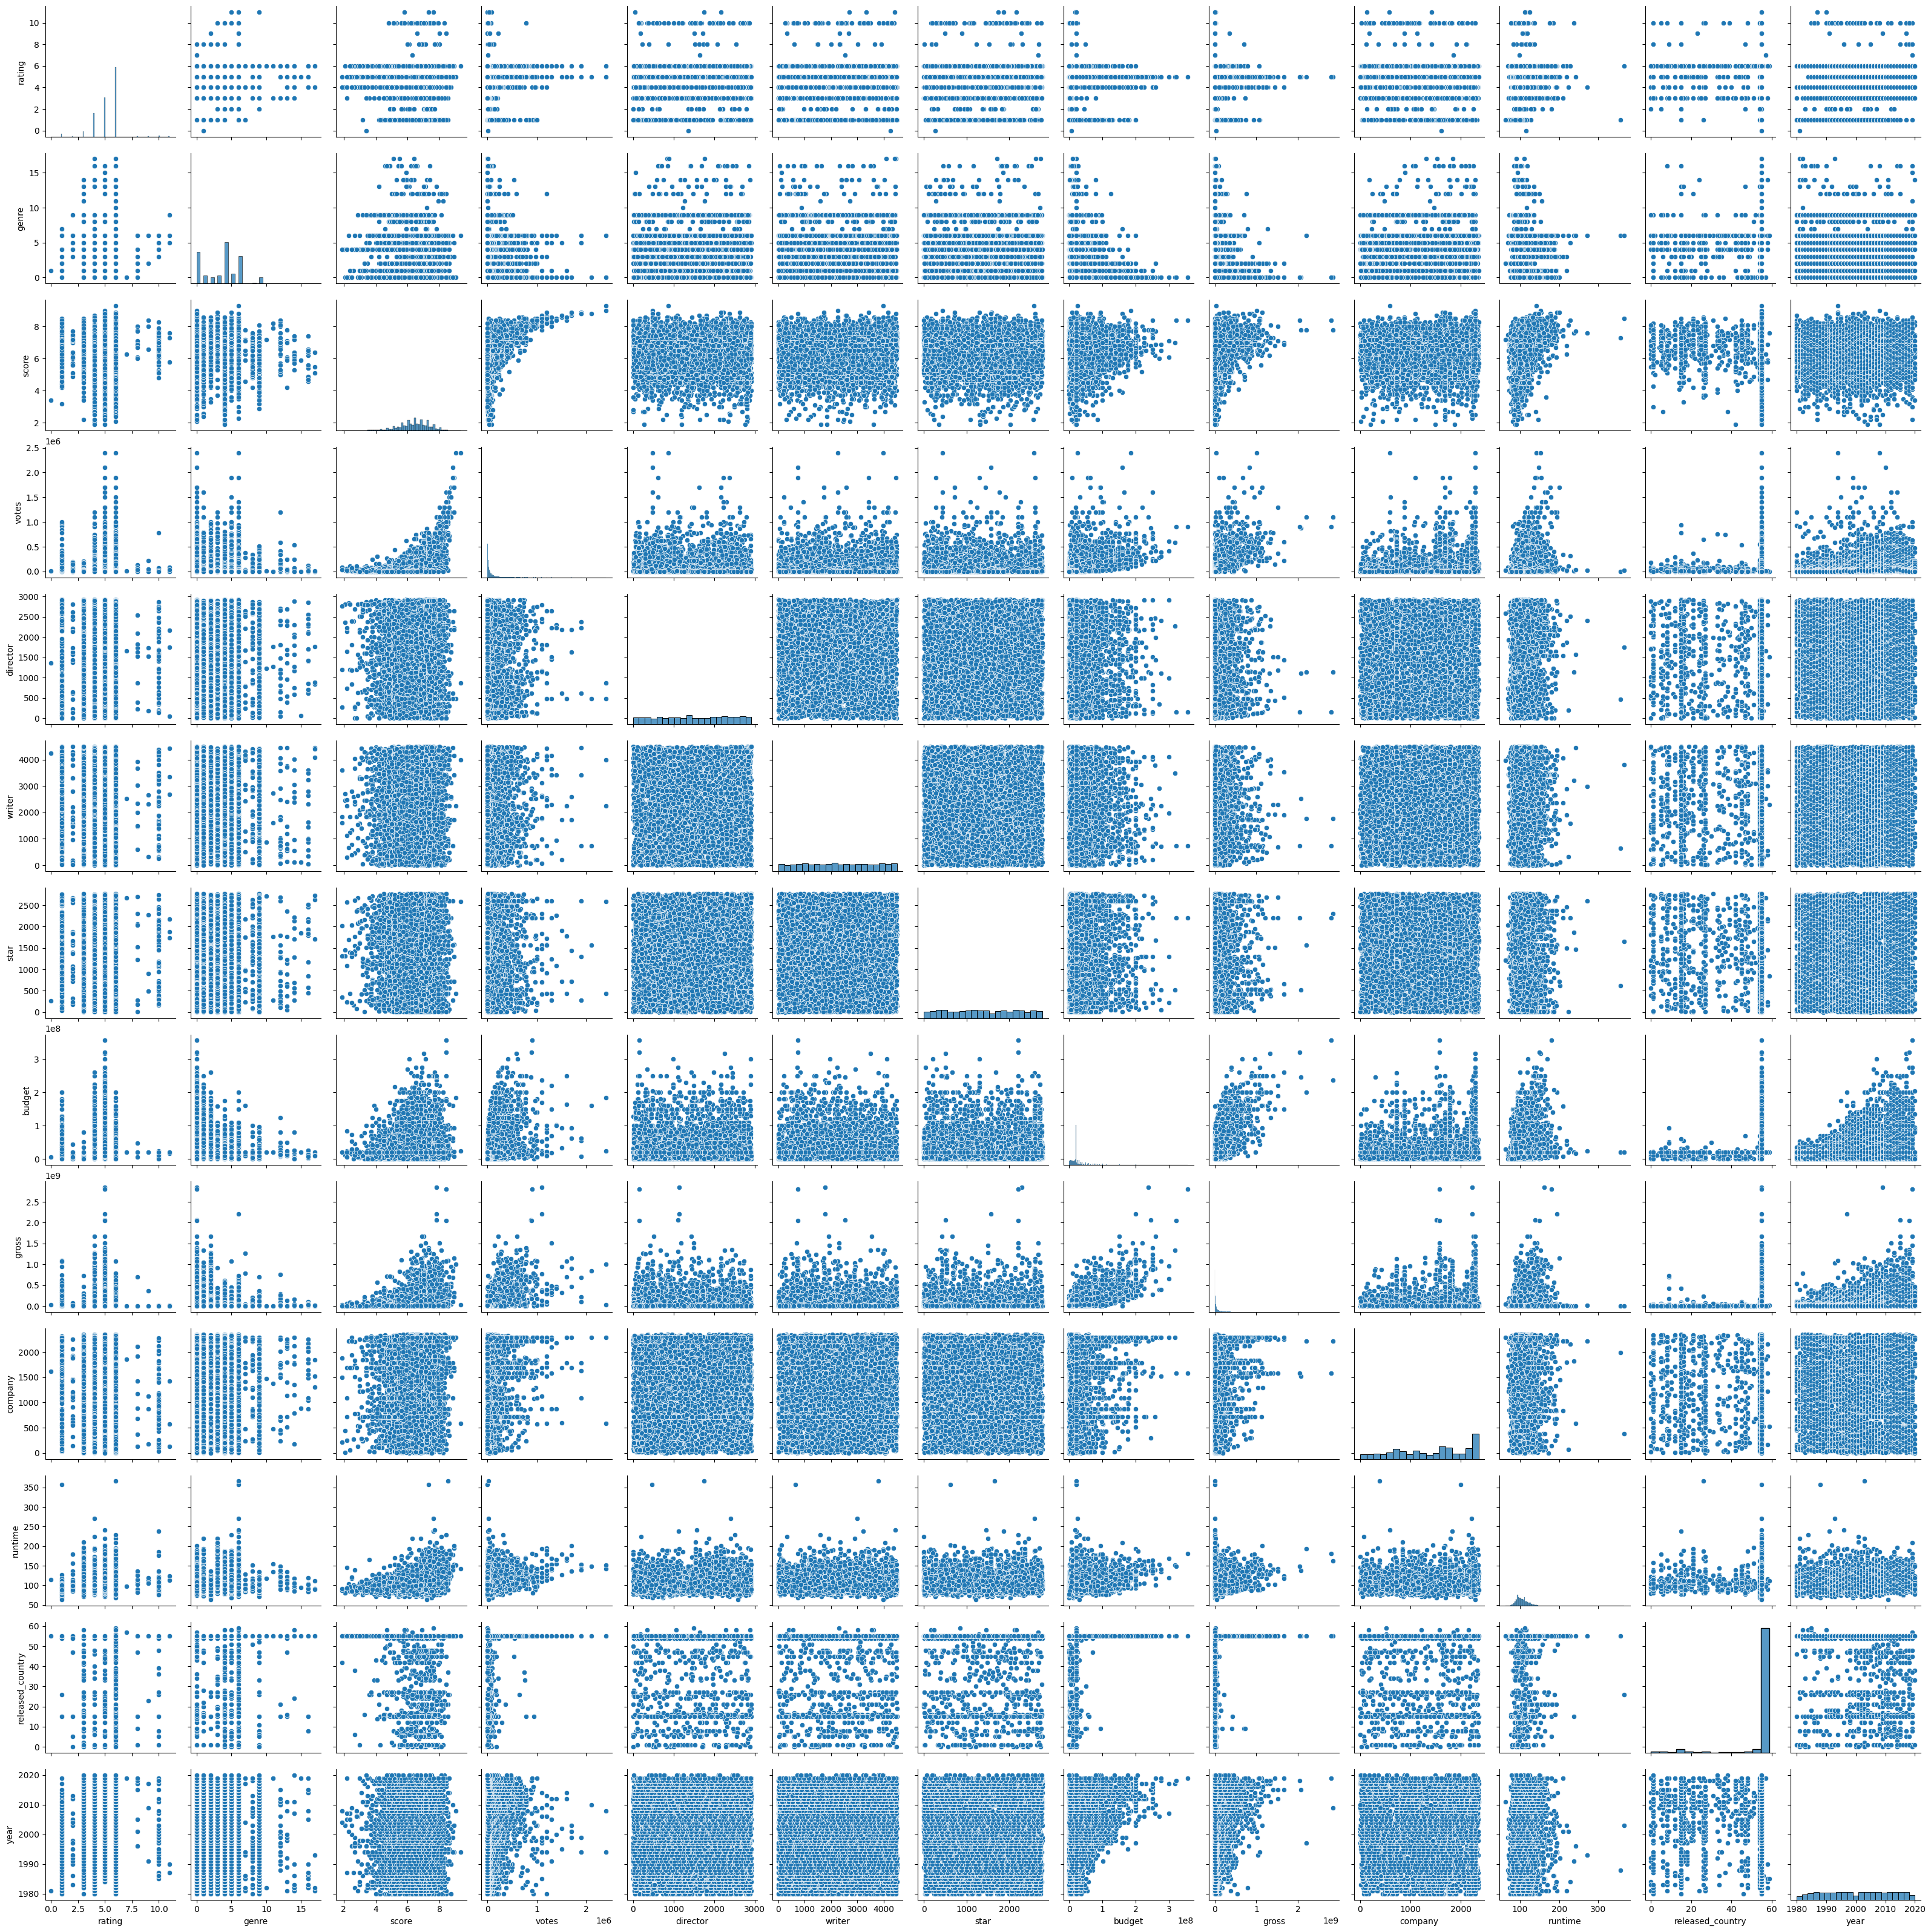

In [300]:
pairplot = sns.pairplot(df_copied)

In [302]:
corr_matrix = df_copied.corr(numeric_only=True)
corr_matrix

rating     genre     score     votes  director    writer  \
rating            1.000000  0.121950  0.015773  0.014065  0.016814 -0.003010   
genre             0.121950  1.000000  0.040718 -0.148709 -0.017860  0.004647   
score             0.015773  0.040718  1.000000  0.411727  0.010648  0.021181   
votes             0.014065 -0.148709  0.411727  1.000000  0.000168  0.000324   
director          0.016814 -0.017860  0.010648  0.000168  1.000000  0.296628   
writer           -0.003010  0.004647  0.021181  0.000324  0.296628  1.000000   
star              0.006702 -0.004945  0.000253 -0.020716  0.039056  0.026751   
budget           -0.148419 -0.335447  0.061637  0.459880 -0.003279 -0.031665   
gross            -0.131146 -0.240216  0.186558  0.631473 -0.015308 -0.023630   
company          -0.080066 -0.073246 -0.001048  0.130324  0.003164  0.001030   
runtime           0.070415 -0.044418  0.401209  0.308876  0.019558 -0.003451   
released_country -0.027078 -0.096085 -0.095527  0.092803  0.013678 -0.002162   
year              0.028053 -0.076886  0.108296  0.216504 -0.021453 -0.007275   

                      star    budget     gross   company   runtime  \
rating            0.006702 -0.148419 -0.131146 -0.080066  0.070415   
genre            -0.004945 -0.335447 -0.240216 -0.073246 -0.044418   
score             0.000253  0.061637  0.186558 -0.001048  0.401209   
votes            -0.020716  0.459880  0.631473  0.130324  0.308876   
director          0.039056 -0.003279 -0.015308  0.003164  0.019558   
writer            0.026751 -0.031665 -0.023630  0.001030 -0.003451   
star              1.000000 -0.020379 -0.002713  0.009075  0.008791   
budget           -0.020379  1.000000  0.745716  0.164519  0.272763   
gross            -0.002713  0.745716  1.000000  0.153772  0.244045   
company           0.009075  0.164519  0.153772  1.000000  0.030134   
runtime           0.008791  0.272763  0.244045  0.030134  1.000000   
released_country -0.024722  0.123841  0.118312  0.093234 -0.015526   
year             -0.030067  0.284383  0.251642 -0.018951  0.119115   

                  released_country      year  
rating                   -0.027078  0.028053  
genre                    -0.096085 -0.076886  
score                    -0.095527  0.108296  
votes                     0.092803  0.216504  
director                  0.013678 -0.021453  
writer                   -0.002162 -0.007275  
star                     -0.024722 -0.030067  
budget                    0.123841  0.284383  
gross                     0.118312  0.251642  
company                   0.093234 -0.018951  
runtime                  -0.015526  0.119115  
released_country          1.000000 -0.090778  
year                     -0.090778  1.000000

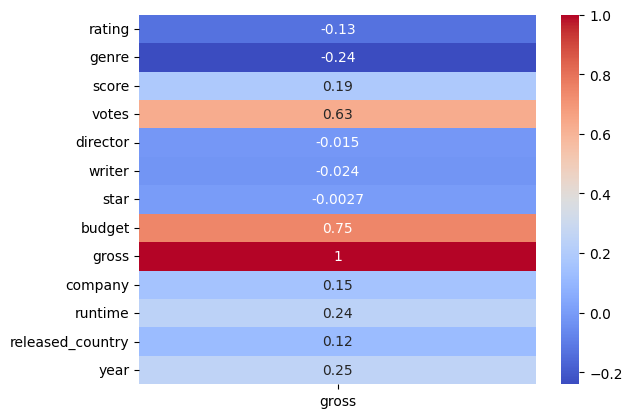

In [310]:
sns.heatmap(data=corr_matrix[['gross']], annot=True, cmap="coolwarm")
plt.show()

Conclusion: Ngân sách và số lượng đánh giá là hai yếu tố ảnh hưởng mạnh nhất đến doanh thu, trong khi các yếu tố như đạo diễn, biên kịch, và diễn viên dường như không có tác động lớn.








